Episode (1/1000)
Episode (2/1000)
Episode (3/1000)
Episode (4/1000)
Episode (5/1000)
Episode (6/1000)
Episode (7/1000)
Episode (8/1000)
Episode (9/1000)
Episode (10/1000)
Episode (11/1000)
Episode (12/1000)
Episode (13/1000)
Episode (14/1000)
Episode (15/1000)
Episode (16/1000)
Episode (17/1000)
Episode (18/1000)
Episode (19/1000)
Episode (20/1000)
Episode (21/1000)
Episode (22/1000)
Episode (23/1000)
Episode (24/1000)
Episode (25/1000)
Episode (26/1000)
Episode (27/1000)
Episode (28/1000)
Episode (29/1000)
Episode (30/1000)
Episode (31/1000)
Episode (32/1000)
Episode (33/1000)
Episode (34/1000)
Episode (35/1000)
Episode (36/1000)
Episode (37/1000)
Episode (38/1000)
Episode (39/1000)
Episode (40/1000)
Episode (41/1000)
Episode (42/1000)
Episode (43/1000)
Episode (44/1000)
Episode (45/1000)
Episode (46/1000)
Episode (47/1000)
Episode (48/1000)
Episode (49/1000)
Episode (50/1000)
Episode (51/1000)
Episode (52/1000)
Episode (53/1000)
Episode (54/1000)
Episode (55/1000)
Episode (56/1000)
E

Episode (438/1000)
Episode (439/1000)
Episode (440/1000)
Episode (441/1000)
Episode (442/1000)
Episode (443/1000)
Episode (444/1000)
Episode (445/1000)
Episode (446/1000)
Episode (447/1000)
Episode (448/1000)
Episode (449/1000)
Episode (450/1000)
Episode (451/1000)
Episode (452/1000)
Episode (453/1000)
Episode (454/1000)
Episode (455/1000)
Episode (456/1000)
Episode (457/1000)
Episode (458/1000)
Episode (459/1000)
Episode (460/1000)
Episode (461/1000)
Episode (462/1000)
Episode (463/1000)
Episode (464/1000)
Episode (465/1000)
Episode (466/1000)
Episode (467/1000)
Episode (468/1000)
Episode (469/1000)
Episode (470/1000)
Episode (471/1000)
Episode (472/1000)
Episode (473/1000)
Episode (474/1000)
Episode (475/1000)
Episode (476/1000)
Episode (477/1000)
Episode (478/1000)
Episode (479/1000)
Episode (480/1000)
Episode (481/1000)
Episode (482/1000)
Episode (483/1000)
Episode (484/1000)
Episode (485/1000)
Episode (486/1000)
Episode (487/1000)
Episode (488/1000)
Episode (489/1000)
Episode (490

Episode (871/1000)
Episode (872/1000)
Episode (873/1000)
Episode (874/1000)
Episode (875/1000)
Episode (876/1000)
Episode (877/1000)
Episode (878/1000)
Episode (879/1000)
Episode (880/1000)
Episode (881/1000)
Episode (882/1000)
Episode (883/1000)
Episode (884/1000)
Episode (885/1000)
Episode (886/1000)
Episode (887/1000)
Episode (888/1000)
Episode (889/1000)
Episode (890/1000)
Episode (891/1000)
Episode (892/1000)
Episode (893/1000)
Episode (894/1000)
Episode (895/1000)
Episode (896/1000)
Episode (897/1000)
Episode (898/1000)
Episode (899/1000)
Episode (900/1000)
Episode (901/1000)
Episode (902/1000)
Episode (903/1000)
Episode (904/1000)
Episode (905/1000)
Episode (906/1000)
Episode (907/1000)
Episode (908/1000)
Episode (909/1000)
Episode (910/1000)
Episode (911/1000)
Episode (912/1000)
Episode (913/1000)
Episode (914/1000)
Episode (915/1000)
Episode (916/1000)
Episode (917/1000)
Episode (918/1000)
Episode (919/1000)
Episode (920/1000)
Episode (921/1000)
Episode (922/1000)
Episode (923

Text(0.5, 1.0, 'e-Greedy Optimal Selected Actions')

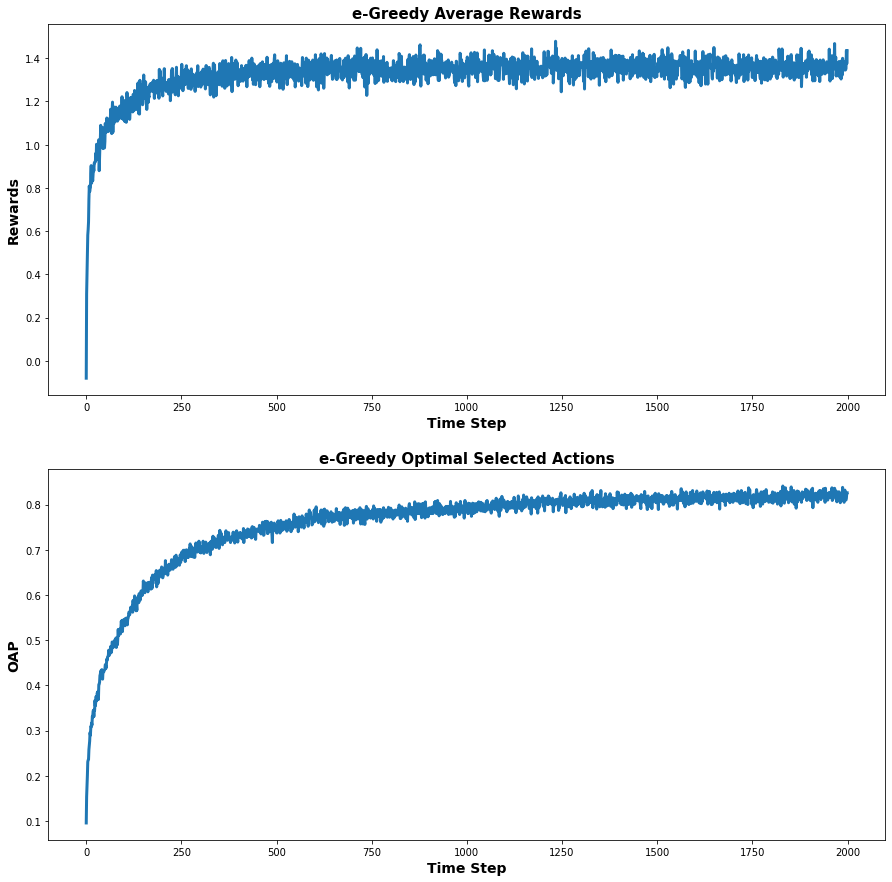

In [23]:
import numpy as np
import matplotlib.pyplot as plt


k = 10

episodes_num = 1000
T = 2000
selected_actions = np.zeros((episodes_num, T), dtype=np.int64)
received_rewards = np.zeros((episodes_num, T))
optimal_actions = np.zeros(episodes_num)
optimal_action_percent = np.zeros((episodes_num, T))

epsilon = 0.1


for episode in range(episodes_num):
    qs = np.random.randn(k)
    optimal_actions[episode] = np.argmax(qs)
    
    Q = np.zeros(k)
    actions_counters = np.zeros(k)
    
    for t in range(T):
        selected_actions[episode, t] = np.random.choice(np.where(Q == Q.max())[0]) if np.random.rand() > epsilon else np.random.randint(low=0, high=k)
        received_rewards[episode, t] = qs[selected_actions[episode, t]] + np.random.randn()
        actions_counters[selected_actions[episode, t]] += 1

        Q[selected_actions[episode, t]] += (received_rewards[episode, t] - Q[selected_actions[episode, t]]) / actions_counters[selected_actions[episode, t]]
    print(f'Episode ({episode+1}/{episodes_num})')

for episode in range(episodes_num):
    optimal_action_percent[episode] = selected_actions[episode] == optimal_actions[episode]
    
reward_average = received_rewards.mean(axis=0)
optimal_action_percent = optimal_action_percent.mean(axis=0)


fig, axs = plt.subplots(2, 1, figsize=(15, 15))
axs[0].plot(reward_average, linewidth=3)
axs[0].set_xlabel('Time Step', fontsize=14, fontweight='bold')
axs[0].set_ylabel('Rewards', fontsize=14, fontweight='bold')
axs[0].set_title('e-Greedy Average Rewards', fontsize=15, fontweight='bold')

axs[1].plot(optimal_action_percent, linewidth=3)
axs[1].set_xlabel('Time Step', fontsize=14, fontweight='bold')
axs[1].set_ylabel('OAP', fontsize=14, fontweight='bold')
axs[1].set_title('e-Greedy Optimal Selected Actions', fontsize=15, fontweight='bold')